<a href="https://colab.research.google.com/github/mitchelfalcon/AI-Studio/blob/main/InterpolacionLagrangeDiferenciasfinitasyHermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTERPOLACIÓN DE LAGRANGE

Polinomio de Lagrange: P(x) = 1.00666666666666*x**3 - 7.13000000000011*x**2 + 6.84333333333052*x - 9.81999999999971


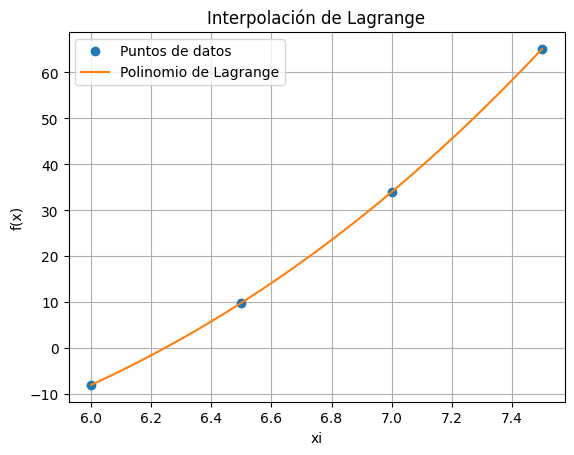

In [3]:
# Interpolación de Lagrange
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO, Datos del ejercicio de la foto
xi = np.array([6, 6.5, 7, 7.5])  # Datos de x
fi = np.array([-8, 9.875, 34, 65.13])  # Datos de y o f(x)

# PROCEDIMIENTO
# Polinomio de Lagrange
x = sym.Symbol('x')
n = len(xi)
polinomio = 0

for i in range(n):
    # Término L_i(x)
    termino = 1
    for j in range(n):
        if i != j:
            termino = termino * ((x - xi[j]) / (xi[i] - xi[j]))

    # Suma de L_i(x) * f_i
    polinomio = polinomio + termino * fi[i]

# Simplificar el polinomio
polinomio_simplificado = sym.simplify(polinomio)
print(f"Polinomio de Lagrange: P(x) = {polinomio_simplificado}")

# Convertir el polinomio a una función de numpy para graficar
px = sym.lambdify(x, polinomio_simplificado, 'numpy')

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a, b, muestras)
pfi = px(pxi)

# Gráfica
plt.plot(xi, fi, 'o', label='Puntos de datos')
plt.plot(pxi, pfi, label='Polinomio de Lagrange')
plt.legend()
plt.xlabel('xi')
plt.ylabel('f(x)')
plt.title('Interpolación de Lagrange')
plt.grid(True)
plt.show()

Valores de fi: [-8.     9.875 34.    65.13 ]
Divisores en L(i): [-0.75  0.25 -0.25  0.75]

Polinomio de Lagrange, expresiones
10.6666666666667*(x - 7.5)*(x - 7.0)*(x - 6.5) + 39.5*(x - 7.5)*(x - 7.0)*(x - 6.0) - 136.0*(x - 7.5)*(x - 6.5)*(x - 6.0) + 86.84*(x - 7.0)*(x - 6.5)*(x - 6.0)

Polinomio de Lagrange simplificado:
1.00666666666666*x**3 - 7.13000000000011*x**2 + 6.84333333333052*x - 9.81999999999243


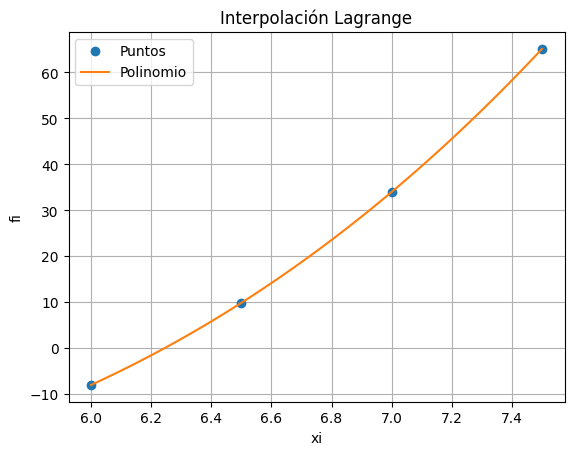

In [2]:
# Interpolacion de Lagrange
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO, Datos del ejercicio de la foto
xi = np.array([6, 6.5, 7, 7.5])  # Datos de x
fi = np.array([-8, 9.875, 34, 65.13])  # Datos de y o f(x)

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype=float)
for i in range(0, n, 1):
    # Término de Lagrange
    numerador = 1
    denominador = 1
    for j in range(0, n, 1):
        if j != i:
            numerador = numerador * (x - xi[j])
            denominador = denominador * (xi[i] - xi[j])
    terminoLi = numerador / denominador

    polinomio = polinomio + terminoLi * fi[i]
    divisorL[i] = denominador

# Simplifica el polinomio
polisimple = sym.simplify(polinomio)

# Para evaluación numérica
px = sym.lambdify(x, polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a, b, muestras)
pfi = px(pxi)

# SALIDA
print('Valores de fi:', fi)
print('Divisores en L(i):', divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange simplificado:')
print(polisimple)

# Gráfica
plt.plot(xi, fi, 'o', label='Puntos')
plt.plot(pxi, pfi, label='Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.grid(True)
plt.show()

In [ ]:
from sympy import symbols, Poly

# Definir la variable
x = symbols('x')

# Obtener el polinomio como objeto de SymPy
poly = Poly(polinomio, x)

# Obtener los coeficientes
coeficientes = poly.all_coeffs()

# Valor de x en el cual evaluar el polinomio
x = 0.5

# Evaluación del polinomio
resultado = np.polyval(coeficientes, x)
print("El valor del polinomio en x =", x, "es", resultado)

El valor del polinomio en x = 0.5 es 2.62500000000000


# DIFERENCIAS FINITAS

El método de diferencias finitas es una técnica de interpolación utilizada cuando los puntos de datos están igualmente espaciados. Su idea central es construir un polinomio de interpolación de Newton–Gregory a partir de una tabla de diferencias, donde cada nivel refleja la variación de la función entre los nodos. Con esta información se puede generar un polinomio que aproxima los valores intermedios de la función, empleando fórmulas hacia adelante o hacia atrás según el punto de interés. Es muy útil porque simplifica los cálculos al aprovechar la regularidad del espaciamiento entre los datos.

p(0.33) = 2.21275
Modo elegido: forward
Polinomio expandido P(x):
      2
-2.5 x + 4.5 x + 1


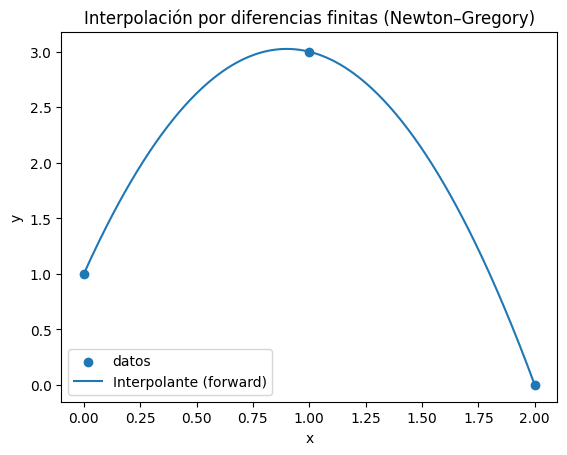

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# ---------- utilidades de diferencias finitas ----------
def _forward_diff_table(y):
    """
    Tabla de diferencias hacia adelante.
    Regresa una lista de arrays: level k = Δ^k f en todos los puntos,
    por lo que level[k][0] = Δ^k f(x0).
    """
    diffs = [np.array(y, dtype=float)]
    while diffs[-1].size > 1:
        diffs.append(np.diff(diffs[-1]))
    return diffs

def _backward_diff_table(y):
    """
    Tabla de diferencias hacia atrás.
    Regresa una lista de escalares: ∇^k f(xn) = último de cada nivel.
    """
    diffs = [np.array(y, dtype=float)]
    while diffs[-1].size > 1:
        diffs.append(np.diff(diffs[-1]))
    return [level[-1] for level in diffs]

def _check_equispaced(x):
    x = np.asarray(x, dtype=float)
    if x.size < 2:
        raise ValueError("Se requieren al menos 2 puntos.")
    h = x[1] - x[0]
    if not np.allclose(np.diff(x), h):
        raise ValueError("Los puntos x deben ser equiespaciados para diferencias finitas.")
    return h

# ---------- evaluador automático (tu función, ampliada a arrays) ----------
def newton_finite_diff_interpolator(x, y):
    """
    Devuelve un evaluador p(xq) que usa Newton–Gregory hacia adelante o hacia atrás
    según el extremo más cercano a xq. Acepta escalar o arreglo.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    h = _check_equispaced(x)

    fwd = _forward_diff_table(y)   # lista de arrays (usar [k][0])
    bwd = _backward_diff_table(y)  # lista de escalares
    x0, xn = x[0], x[-1]

    def p(xq):
        xq = np.asarray(xq, dtype=float)
        out = np.empty_like(xq, dtype=float)

        # máscara: qué puntos están más cerca de x0 (adelante) o de xn (atrás)
        use_forward = np.abs(xq - x0) <= np.abs(xq - xn)

        # --- adelante ---
        if np.any(use_forward):
            s = (xq[use_forward] - x0) / h
            acc = np.zeros_like(s)
            falling = np.ones_like(s)  # s(s-1)(s-2)...
            for k in range(len(fwd)):
                acc += fwd[k][0] * falling / factorial(k)
                falling *= (s - k)
            out[use_forward] = acc

        # --- atrás ---
        if np.any(~use_forward):
            s = (xq[~use_forward] - xn) / h
            acc = np.zeros_like(s)
            rising = np.ones_like(s)   # s(s+1)(s+2)...
            for k in range(len(bwd)):
                acc += bwd[k] * rising / factorial(k)
                rising *= (s + k)
            out[~use_forward] = acc

        return out if out.shape else float(out)

    return p

# ---------- polinomio expandido (Newton–Gregory) ----------
def _poly_forward(x, y):
    """
    Polinomio expandido usando Newton–Gregory hacia adelante:
    P(x) = sum_k Δ^k f(x0)/(k! h^k) prod_{j=0}^{k-1} (x - (x0 + j h))
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    h = _check_equispaced(x)
    x0 = x[0]
    fwd = _forward_diff_table(y)

    P = np.poly1d([0.0])
    prod = np.poly1d([1.0])
    for k in range(len(fwd)):
        if k > 0:
            prod *= np.poly1d([1.0, -(x0 + (k-1)*h)])
        coef = fwd[k][0] / (factorial(k) * h**k)
        P = P + coef * prod
    return P

def _poly_backward(x, y):
    """
    Polinomio expandido usando Newton–Gregory hacia atrás:
    P(x) = sum_k ∇^k f(xn)/(k! h^k) prod_{j=0}^{k-1} (x - (xn - j h))
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    h = _check_equispaced(x)
    xn = x[-1]
    bwd = _backward_diff_table(y)

    P = np.poly1d([0.0])
    prod = np.poly1d([1.0])
    for k in range(len(bwd)):
        if k > 0:
            prod *= np.poly1d([1.0, -(xn - (k-1)*h)])
        coef = bwd[k] / (factorial(k) * h**k)
        P = P + coef * prod
    return P

def newton_finite_diff_polynomial(x, y, mode="auto"):
    """
    Devuelve el polinomio expandido P(x) como numpy.poly1d.
    mode: "forward", "backward" o "auto" (elige la mejor forma
    en función de la magnitud de |Δ^n f(x0)| vs |∇^n f(xn)|).
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    _ = _check_equispaced(x)

    if mode == "forward":
        return _poly_forward(x, y), "forward"
    if mode == "backward":
        return _poly_backward(x, y), "backward"

    # auto: comparo el último término de cada esquema (heurística)
    last_fwd = abs(_forward_diff_table(y)[-1][0])
    last_bwd = abs(_backward_diff_table(y)[-1])
    if last_fwd <= last_bwd:
        return _poly_forward(x, y), "forward"
    else:
        return _poly_backward(x, y), "backward"

# ---------- demo rápido (tu ejemplo) ----------
if __name__ == "__main__":
    # Tus datos:
    xs = np.array([0, 1, 2])     # x equiespaciados
    ys = np.array([1, 3, 0])     # y = f(x)

    # Evaluador automático (adelante/atrás)
    p = newton_finite_diff_interpolator(xs, ys)
    print("p(0.33) =", p(0.33))

    # Polinomio expandido (elige automáticamente forward/backward)
    P, modo = newton_finite_diff_polynomial(xs, ys, mode="auto")
    print(f"Modo elegido: {modo}")
    print("Polinomio expandido P(x):")
    print(P)  # numpy.poly1d imprime coeficientes de mayor a menor grado

    # Gráfica simple
    xx = np.linspace(xs.min(), xs.max(), 300)
    plt.scatter(xs, ys, label="datos")
    plt.plot(xx, P(xx), label=f"Interpolante ({modo})")
    plt.title("Interpolación por diferencias finitas (Newton–Gregory)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


# INTERPOLACIÓN DE HERMITE

La interpolación de Hermite extiende la interpolación polinómica clásica incorporando no solo los valores de la función en ciertos nodos, sino también las derivadas en esos mismos puntos. De este modo, el polinomio resultante no solo pasa por los datos, sino que además iguala la pendiente (o curvatura, si se incluyen derivadas de orden superior), logrando una aproximación más fiel y suave. El procedimiento se construye mediante diferencias divididas con nodos repetidos, garantizando que se respete tanto el valor como la derivada en cada nodo.

Nodos repetidos z: [0. 0. 1. 1.]
Coeficientes de Newton (diagonal): [ 0.          1.         -0.45969769  0.45969769]
Polinomio expandido P(x):
        3          2
0.4597 x - 0.9194 x + 1 x


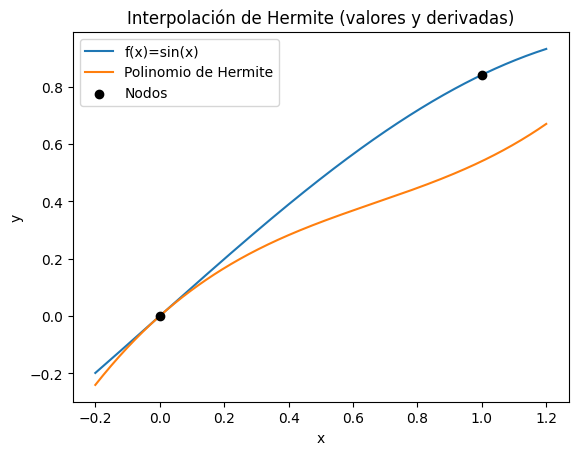

In [ ]:
# hermite_interpolation.py
# Interpolación de Hermite (usa valores y derivadas en los nodos).
# Requiere: numpy, matplotlib

import numpy as np
import matplotlib.pyplot as plt

def hermite_newton(x, y, dy):
    """
    Construye el polinomio de Hermite vía diferencias divididas con nodos repetidos.
    Parámetros:
        x  : array de nodos (longitud n)
        y  : valores f(x_i)
        dy : derivadas f'(x_i)
    Devuelve:
        P      : numpy.poly1d con el polinomio expandido en x
        H      : función evaluadora H(t) usando la forma de Newton
        z      : nodos repetidos (longitud 2n)
        coeffs : coeficientes de Newton (diagonal de la tabla), longitud 2n
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    dy = np.asarray(dy, dtype=float)
    n = len(x)
    if not (len(y) == len(dy) == n):
        raise ValueError("x, y y dy deben tener la misma longitud.")
    m = 2 * n

    # Nodos repetidos
    z = np.repeat(x, 2)  # z[2i] = z[2i+1] = x_i

    # Tabla Q de diferencias divididas
    Q = np.zeros((m, m), dtype=float)
    Q[0::2, 0] = y       # filas pares: y_i
    Q[1::2, 0] = y       # filas impares: y_i

    # Primera columna (orden 1)
    Q[0::2, 1] = dy                   # Q[2i,1] = f'(x_i)
    Q[1::2, 1] = dy                   # Q[2i+1,1] = f'(x_i) también (repetición)

    # Resto de columnas (orden >= 2)
    for j in range(2, m):
        for i in range(j, m):
            denom = z[i] - z[i - j]
            Q[i, j] = (Q[i, j - 1] - Q[i - 1, j - 1]) / denom

    # Coeficientes de Newton (diagonal)
    coeffs = Q.diagonal().copy()

    # Polinomio expandido P(x) en base estándar
    P = np.poly1d([0.0])
    factor = np.poly1d([1.0])
    for k in range(m):
        P = P + coeffs[k] * factor
        factor = factor * np.poly1d([1.0, -z[k]])  # *(x - z_k)

    # Evaluador en forma de Newton (más estable)
    def H(t):
        t = np.asarray(t, dtype=float)
        acc = np.zeros_like(t, dtype=float)
        prod = np.ones_like(t, dtype=float)
        for k in range(m):
            acc = acc + coeffs[k] * prod
            prod = prod * (t - z[k])
        return acc

    return P, H, z, coeffs

# ---------------- DEMO ----------------
if __name__ == "__main__":
    # Ejemplo: f(x)=sin(x), f'(x)=cos(x) en nodos 0 y 1
    x  = np.array([0.0, 1.0])
    y  = np.sin(x)
    dy = np.cos(x)

    P, H, z, coeffs = hermite_newton(x, y, dy)

    print("Nodos repetidos z:", z)
    print("Coeficientes de Newton (diagonal):", coeffs)
    print("Polinomio expandido P(x):")
    print(P)  # numpy.poly1d muestra coeficientes de mayor a menor grado

    # Gráfica comparativa
    xx = np.linspace(min(x)-0.2, max(x)+0.2, 400)
    plt.figure()
    plt.plot(xx, np.sin(xx), label="f(x)=sin(x)")
    plt.plot(xx, H(xx), label="Polinomio de Hermite")
    plt.scatter(x, y, color="k", zorder=3, label="Nodos")
    plt.title("Interpolación de Hermite (valores y derivadas)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


# Actividad de reforzamiento

Obtener el polinomio de interpolación usando la fórmula de interpolación de Lagrange con la siguiente tabla de valores, e interpolar en el punto $x=-3$.


| $x_k$ | $y_k$ |
| --- | --- |
| 1 | 10 |
| -4 | 10 |
| -7 | 34 |